In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Breast_cancer_data[1].csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
#adding a new column for the line intercept and initializing with ones
#inserting a new column as first column
# df.insert(loc=0,column='theta0',value=1)
# df
df = np.array(df)
#np.random.shuffle(df)
df

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02, 0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01, 0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 1.000e+00]])

In [4]:
for i in range(df.shape[0]):
    if df[i,-1]==0: df[i,-1]=-1

In [5]:
#splitting the dataset into training and testing set
r = df.shape[0]
c = df.shape[1]
#df = np.array(df)
idx = 8*r//10
x_train = df[:idx,:c-1]
y_train = df[:idx,-1]
x_test  = df[idx:,:c-1]
y_test  = df[idx:,-1]
print("x training data:")
print(x_train,end="\n\n")
print("y training data:")
print(y_train,end="\n\n")
print("x testing data:")
print(x_test,end="\n\n")
print("y testing data:")
print(y_test)

x training data:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.200e+01 2.823e+01 7.677e+01 4.425e+02 8.437e-02]
 [1.453e+01 1.398e+01 9.386e+01 6.442e+02 1.099e-01]
 [1.262e+01 1.715e+01 8.062e+01 4.929e+02 8.583e-02]]

y training data:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1. -1.
 -1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.
  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. 

In [6]:
#normalizing the data
for c in range(x_train.shape[1]):
        min_train = np.min(x_train[:,c])
        max_train = np.max(x_train[:,c])
        x_train[:,c]=(x_train[:,c]-min_train)/(max_train-min_train)
        x_test[:,c]=(x_test[:,c]-min_train)/(max_train-min_train)
print(x_train,end="\n\n")
print(x_test)

[[0.52103744 0.0226581  0.54598853 0.3640416  0.68000973]
 [0.64314449 0.27257355 0.61578329 0.50201656 0.27047086]
 [0.60149557 0.3902604  0.59574321 0.44979834 0.57294075]
 ...
 [0.23754082 0.62631045 0.22790408 0.12693696 0.2659691 ]
 [0.35728146 0.14440311 0.34600235 0.21256633 0.57659083]
 [0.26688438 0.25160636 0.25450902 0.14833369 0.28373281]]

[[ 0.3028539   0.71051742  0.29403635  0.1756315   0.36427789]
 [ 0.22002934  0.66215759  0.21477438  0.11530461  0.37790485]
 [ 0.29480808  0.52553263  0.27855711  0.16743791  0.30904003]
 [ 0.28486914  0.52147447  0.26826066  0.15992358  0.25769558]
 [ 0.13128875  0.62529591  0.12362656  0.06257695  0.2108529 ]
 [ 0.47796867  0.58978695  0.46582821  0.33428147  0.44372795]
 [ 0.96734346  0.56002705  0.9889434   1.00084908  0.55834043]
 [ 0.35112878  0.58437606  0.33487665  0.21337296  0.09052196]
 [ 0.21860949  0.29252621  0.20793311  0.11428571  0.27460762]
 [ 0.29291495  0.28779168  0.27980098  0.16718319  0.1478282 ]
 [ 0.29622793  

In [7]:
# Using hinge loss function
# def hypothesis(x,w):
#     return np.dot(x,w)


def grad_descent(x,y,reg,alpha,epoch):
    r=x.shape[0]
    c=x.shape[1]
    w = np.zeros((c,1))
    b=0
    min_w=[]
    min_b=None
    min_cost=None
    cost_list=[]
    for itr in range(epoch):
        cost = reg*np.dot(w.T,w)
        for i in range(r):
            if y[i]*np.dot(x[i],w)<1:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j]-y[i]*x[i,j])
                b-=alpha*y[i]*-1
            else:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j])
                cost+= 1-y[i]*np.dot(x[i],w)  
        #print(cost)
        cost_list.append(cost[0])
        if min_cost is None or min_cost>cost:
            min_cost=cost
            min_w=w
            min_b=b
            
    return min_w,min_b,np.array(cost_list)

def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('no. of iterations')
    plt.ylabel('cost')
    
def calAccuracy(pred,y_):
    correct=0
    for i in range(len(pred)):
        if pred[i]==y_[i]:
            correct+=1
    return correct*100/len(pred)

def predict(x_,y_,w,b):
    py = np.dot(x_,w)+b
    py=list(py)
    for i in range(len(py)):
        if py[i]>=1:
            py[i]=1.0
        else:
            py[i]=-1.0
    return py

def showPredictions(pred,y_):
    for i in range(len(pred)):
        print("predicted: ",pred[i],end='  ')
        print("actual: ",y_[i])

[[-0.21512797]
 [ 1.55679268]
 [-0.62314569]
 [-1.88492384]
 [ 2.63111855]] 757.1000000001036
(500, 1)
accuracy of model: 77.19298245614036%


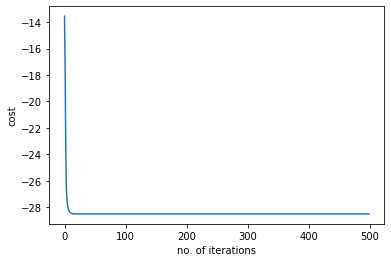

In [8]:
alpha = 0.1
epoch = 500
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [9]:
showPredictions(pred_y,y_test)

predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predi

[[-0.43789782]
 [-0.07816905]
 [-0.46911958]
 [-0.48939656]
 [ 0.10034874]] 1.513199999999866
(90, 1)
accuracy of model: 93.85964912280701%


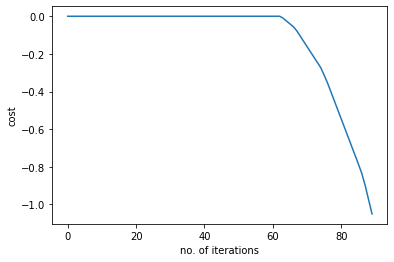

In [52]:
alpha = 0.0002
epoch = 90
reg = 0.0002 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [53]:
showPredictions(pred_y,y_test)

predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  -1.0  actual:  -1.0
predicted:  -1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  -1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  -1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  -1.0  actual:  -1.0


[[-0.56947888]
 [-0.04308546]
 [-0.62117915]
 [-0.67868862]
 [ 0.26869908]] 2.724600000000307
(100, 1)
accuracy of model: 77.19298245614036%


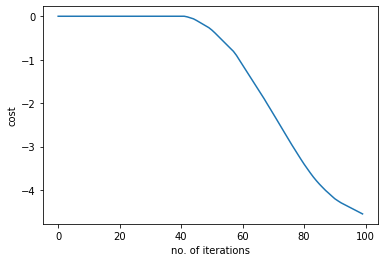

In [57]:
alpha = 0.0003
epoch = 100
reg = 0.001 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[ 0.33586249]
 [ 0.71792059]
 [ 0.28797686]
 [-0.04128023]
 [ 0.98401912]] 11.499999999999977
(1000, 1)
accuracy of model: 77.19298245614036%


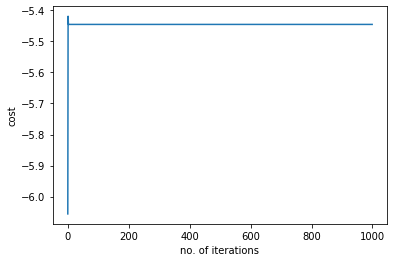

In [12]:
alpha = 0.1
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[0.17389015]
 [0.19709007]
 [0.16639255]
 [0.08425245]
 [0.24432961]] 34.79999999999995
(300, 1)
accuracy of model: 77.19298245614036%


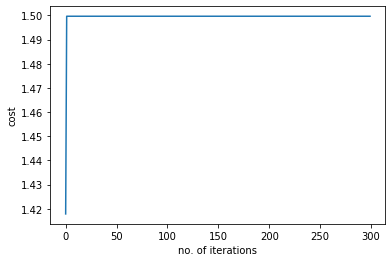

In [23]:
alpha = 0.4
epoch = 300
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [24]:
showPredictions(pred_y,y_test)

predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  1.0
predicted:  1.0  actual:  -1.0
predi

[[-0.3102375 ]
 [ 0.06898291]
 [-0.34832021]
 [-0.43232698]
 [ 0.33349587]] 3.4399999999999706
(1000, 1)
accuracy of model: 77.19298245614036%


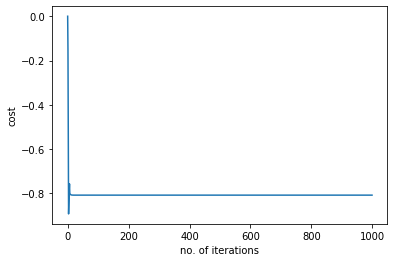

In [15]:
alpha = 0.01
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[ 4.44229634e-03]
 [ 1.03108599e-02]
 [ 4.08200221e-03]
 [-1.47838696e-05]
 [ 1.06505813e-02]] 0.8300000000000006
(1000, 1)
accuracy of model: 22.80701754385965%


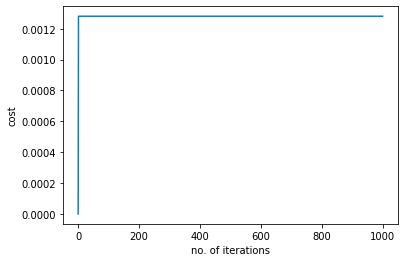

In [16]:
alpha = 0.01
epoch = 1000
reg = 5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [17]:
showPredictions(pred_y,y_test)

predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  -1.0
predicted:  -1.0  actual:  -1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  -1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  -1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
predicted:  -1.0  actual:  1.0
pred

[[0.27460077]
 [0.24155907]
 [0.26269545]
 [0.15392822]
 [0.32454899]] 80.79999999999986
(500, 1)
accuracy of model: 77.19298245614036%


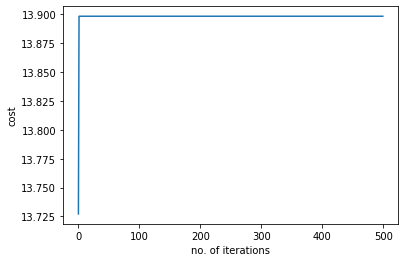

In [18]:
alpha = 0.8
epoch = 500
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")